In [1]:
import re
import os
def get_file_directory(cache_level):
    dirs = []
    for i in [0.5,1,4,8]:
        dirs.append(os.getcwd()+f"/{cache_level}_{i}/")
    return dirs

files = ["bfs-3.trace.gz-bimodal-no-no-no-next_line-lru-1core.txt",
"cc-5.trace.gz-bimodal-no-no-no-next_line-lru-1core.txt",
"sssp-5.trace.gz-bimodal-no-no-no-next_line-lru-1core.txt"
]

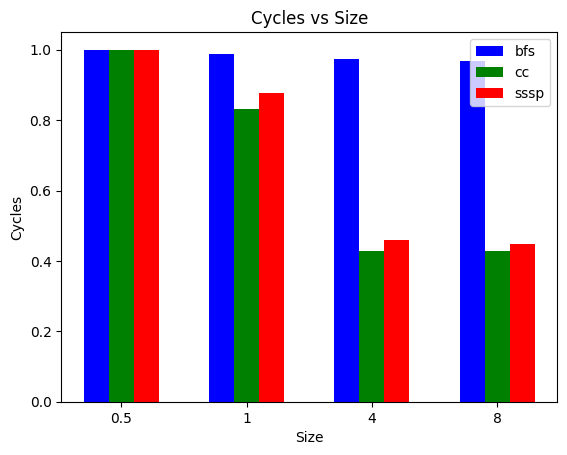

In [9]:
import numpy as np
import matplotlib.pyplot as plt
pattern ={
    'cycles': r'CPU 0 cumulative IPC: [0-9.]* instructions: [0-9]* cycles: ([0-9]*)',
}

x  = np.arange(4)
data = ["0.5","1","4","8"]
bfs_data = np.array([])
cc_data = np.array([])
sssp_data = np.array([])

def get_data(file):
    with open(file, "r") as f:
        for line in f:
            for key in pattern:
                match = re.search(pattern[key], line)
                if match:
                    return int(match.group(1))
    return None
# print(get_data(get_file_directory("l1")[0]+files[0]))
def parse_data(level):
    global bfs_data
    global cc_data
    global sssp_data
    # for level in ['l1']:

    for i in range(len(files)):
        for dir in get_file_directory(level):
            # if(file == "bfs-3.trace.gz-bimodal-no-no-no-next_line-lru-1core.txt"):
            #     bfs_data = np.append(bfs_data, get_data(dir+file))
            # elif(file == "cc-5.trace.gz-bimodal-no-no-no-next_line-lru-1core.txt"):
            #     cc_data = np.append(cc_data, get_data(dir+file))
            # elif(file == "sssp_data-5.trace.gz-bimodal-no-no-no-next_line-lru-1core.txt"):
            #     sssp_data = np.append(sssp_data, get_data(dir+file))
            if(i == 0):
                bfs_data = np.append(bfs_data, get_data(dir+files[0]))
            elif(i == 1): 
                cc_data = np.append(cc_data, get_data(dir+files[1]))
            elif(i == 2):
                sssp_data = np.append(sssp_data, get_data(dir+files[2]))
             

# print(bfs_data)
parse_data("llc")
bar_width = 0.2
bfs_data = bfs_data/np.max(bfs_data)
cc_data = cc_data/np.max(cc_data)
sssp_data = sssp_data/np.max(sssp_data)
plt.bar(x-bar_width, bfs_data, width=bar_width, color='b', label='bfs')            
plt.bar(x, cc_data, width=bar_width, color='g', label='cc')
plt.bar(x+bar_width, sssp_data, width=bar_width, color='r',  label='sssp')

plt.xlabel("Size")
plt.ylabel("Cycles")
plt.title("Cycles vs Size")
plt.xticks(x, data)
plt.legend()
# plt.yscale("log")
plt.show()